In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
articles = pd.read_csv('drive/MyDrive/howpop_train.csv')
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   url               134137 non-null  object 
 1   domain            134137 non-null  object 
 2   post_id           134137 non-null  int64  
 3   published         134137 non-null  object 
 4   author            97657 non-null   object 
 5   flow              97048 non-null   object 
 6   polling           134137 non-null  bool   
 7   content_len       134137 non-null  int64  
 8   title             134137 non-null  object 
 9   comments          134137 non-null  int64  
 10  favs              134137 non-null  int64  
 11  views             134137 non-null  int64  
 12  votes_plus        133566 non-null  float64
 13  votes_minus       133566 non-null  float64
 14  views_lognorm     134137 non-null  float64
 15  favs_lognorm      134137 non-null  float64
 16  comments_lognorm  13

In [ ]:
articles.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,1.627469,1.300050,1.167375
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356


In [ ]:
articles['published'] = pd.to_datetime(articles['published']).dt.date

преобразовали дату публикации `published` в формат datetime

In [ ]:
articles.isnull().sum()

url                     0
domain                  0
post_id                 0
published               0
author              36480
flow                37089
polling                 0
content_len             0
title                   0
comments                0
favs                    0
views                   0
votes_plus            571
votes_minus           571
views_lognorm           0
favs_lognorm            0
comments_lognorm        0
dtype: int64

**Вывод: в датафрейме присутствуют нулевые значения, необходимо их обработать.**

In [ ]:
articles['author'].fillna('Unknown', inplace=True)

In [ ]:
articles['flow'].fillna('misc', inplace=True)
flow_counts = articles['flow'].value_counts()
print(flow_counts)

flow
misc          60193
develop       53318
admin          7902
management     6815
design         3320
marketing      2589
Name: count, dtype: int64


объеденили все пустые значения в `flow` с  `flow` -- `misc` (разное)



In [ ]:
articles[['votes_plus', 'votes_minus']].describe()

,votes_plus,votes_minus
count,133566.000000,133566.000000
mean,35.536888,8.050035
std,42.461073,11.398282
min,0.000000,0.000000
25%,11.000000,2.000000
50%,22.000000,5.000000
75%,45.000000,10.000000
max,1466.000000,445.000000


если количество лайков и дизлайков, суммарно, больше чем просмотров, то эта статья имеет не точные данные для анализа.

In [ ]:
articles_to_drop = articles[articles['votes_plus'] + articles['votes_minus'] > articles['views']]
articles.drop(articles_to_drop.index, inplace=True)

print(f"Deleted {articles_to_drop.shape[0]} articles")

Deleted 69 articles


заменили все пустые значения лайков и дизлайков соответствующими медианными значениями

In [ ]:
median_votes_plus = int(articles['votes_plus'].median())
median_votes_minus = int(articles['votes_minus'].median())

articles['votes_plus'].fillna(median_votes_plus, inplace=True)
articles['votes_minus'].fillna(median_votes_minus, inplace=True)

In [ ]:
articles.isnull().sum()

url                 0
domain              0
post_id             0
published           0
author              0
flow                0
polling             0
content_len         0
title               0
comments            0
favs                0
views               0
votes_plus          0
votes_minus         0
views_lognorm       0
favs_lognorm        0
comments_lognorm    0
dtype: int64

По итогу: очищены все nan-значения.

**Выведем некоторые графики для общего понимания о данных**




In [ ]:
articles['content_len'].describe()

count    134068.000000
mean       7519.950943
std        8725.861389
min           1.000000
25%        2181.000000
50%        4953.000000
75%        9860.000000
max      352471.000000
Name: content_len, dtype: float64

<Axes: xlabel='content_len', ylabel='Count'>

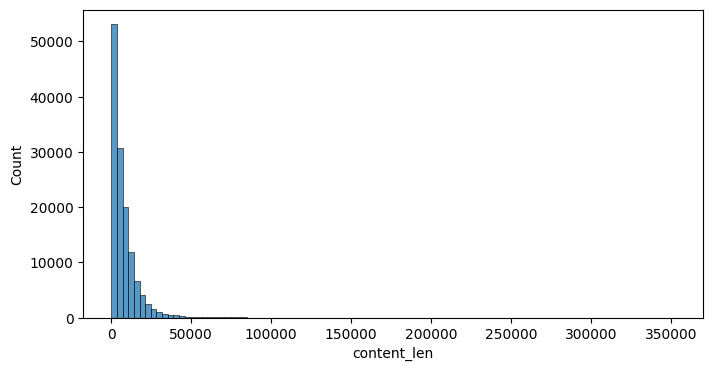

In [ ]:
fix, axes = plt.subplots(figsize=(8, 4))
sns.histplot(articles["content_len"], bins=100)

Text(0.5, 1.0, 'Сумма просмотров статей по категориям')

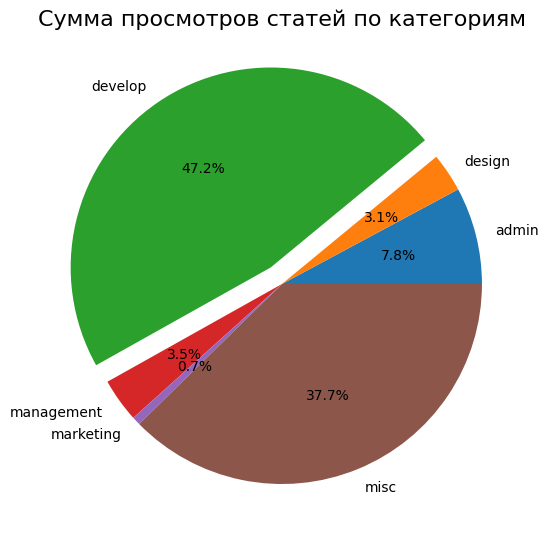

In [ ]:
grouped_articles = articles.groupby(['flow'])['views'].sum()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    grouped_articles,
    labels=grouped_articles.index,
    autopct='%.1f%%',
    explode = [0, 0, 0.1, 0, 0, 0],
);
axes.set_title('Сумма просмотров статей по категориям', fontsize=16)

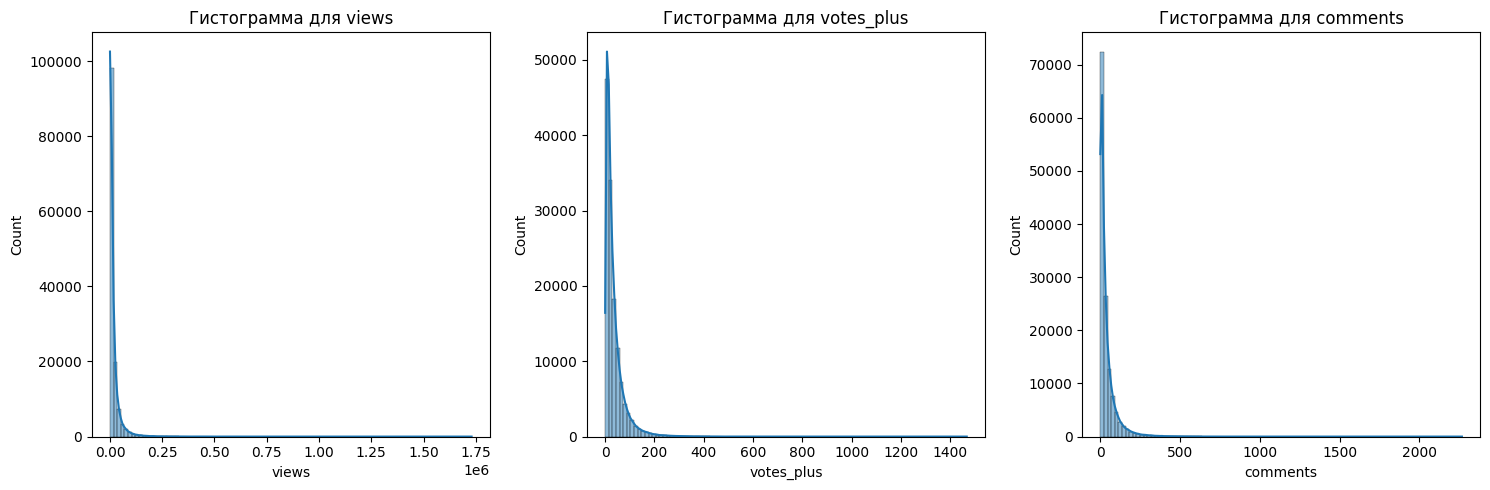

In [ ]:
columns_to_check = ['views', 'votes_plus', 'comments']
plt.figure(figsize=(15, 5))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(1, 3, i)
    sns.histplot(articles[column], kde=True, bins=100)
    plt.title(f'Гистограмма для {column}')
plt.tight_layout()
plt.show()


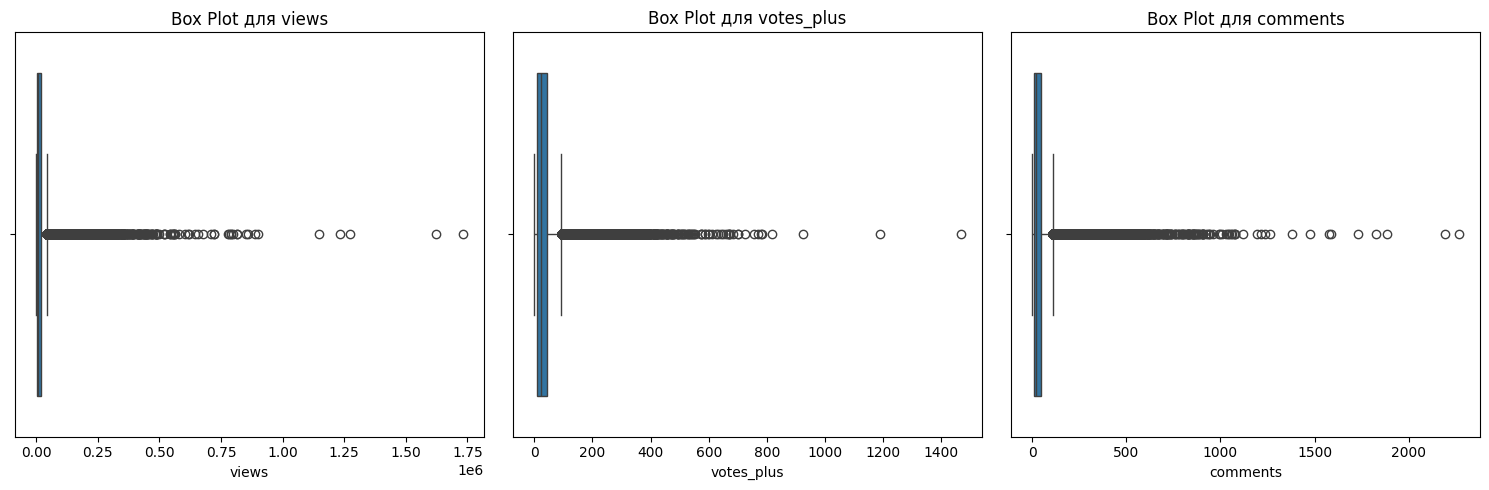

In [ ]:
plt.figure(figsize=(15, 5))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=articles[column])
    plt.title(f'Box Plot для {column}')
plt.tight_layout()
plt.show()

графики выше показывают, что вероятнее всего распределения у интересующих нас парамтеров не нормальные

**Проверим распределения на нормальность**

In [ ]:
columns_to_check = ['views', 'votes_plus', 'comments']
for column in columns_to_check:
    stat, p_value = stats.normaltest(articles[column])
    print()
    print(f'{column}: p-значение={p_value:.4f}')

    if p_value > 0.05:
        print(f'Распределение столбца {column} похоже на нормальное')
    else:
        print(f'Распределение столбца {column} отличается от нормального')


views: p-значение=0.0000
Распределение столбца views отличается от нормального

votes_plus: p-значение=0.0000
Распределение столбца votes_plus отличается от нормального

comments: p-значение=0.0000
Распределение столбца comments отличается от нормального


Использован тест **Д'Агостино**, который лучше всего работает на больших выборках и менее чувствителен к выбросам.

Таким образом, можно сделать однозначный вывод, что распределения столбцов view, votes_plus, comments -- не "нормальны".




**Выдвинем несколько гипотез и проверим их**

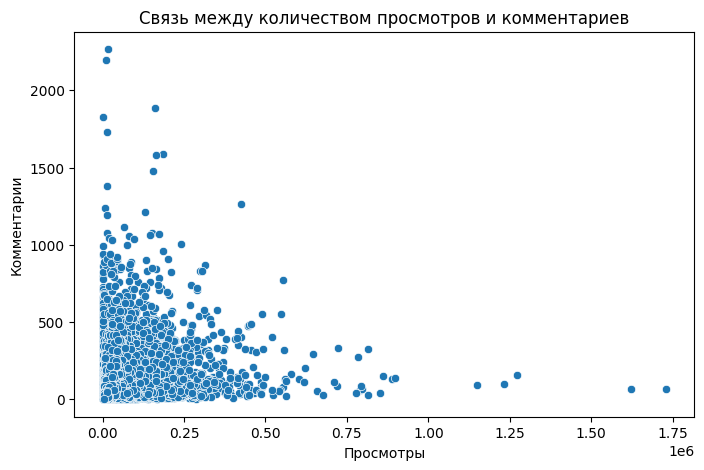

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='views', y='comments', data=articles)
plt.title('Связь между количеством просмотров и комментариев')
plt.xlabel('Просмотры')
plt.ylabel('Комментарии')
plt.show()

выдвигаем гипотезу, что Среднее количество комментариев `comments` и просмотров `views` связано

In [ ]:
_, p_views = stats.shapiro(articles['views'])
_, p_comments = stats.shapiro(articles['comments'])

corr, p_value = stats.spearmanr(articles['views'], articles['comments'])
print(f'Коэффициент корреляции Спирмена: {corr:.4f}, p-значение: {p_value:.4f}')

Коэффициент корреляции Спирмена: 0.2776, p-значение: 0.0000


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 134068.
  res = hypotest_fun_out(*samples, **kwds)


Исходя из полученного результата, можно сделать вывод, что существует статистически значимая связь между количеством комментариев и количеством просмотров. Это подтверждает гипотезу о наличии связи, хотя и слабой.

In [ ]:
_, p_content_len = stats.shapiro(articles['content_len'])
_, p_votes_plus = stats.shapiro(articles['votes_plus'])
_, p_views = stats.shapiro(articles['views'])


выдвигаем гипотезу, что существует связь между длиной статьи `content_len` и лайками `votes_plus`

In [ ]:

if p_content_len > 0.05 and p_votes_plus > 0.05:
    corr_likes, p_value_likes = stats.pearsonr(articles['content_len'], articles['votes_plus'])
    print(f'Коэффициент корреляции Пирсона (content_len и votes_plus): {corr_likes:.4f}, p-значение: {p_value_likes:.4f}')
else:
    corr_likes, p_value_likes = stats.spearmanr(articles['content_len'], articles['votes_plus'])
    print(f'Коэффициент корреляции Спирмена (content_len и votes_plus): {corr_likes:.4f}, p-значение: {p_value_likes:.4f}')

Коэффициент корреляции Спирмена (content_len и votes_plus): 0.0796, p-значение: 0.0000


Это указывает на очень слабую корреляцию между длиной статьи и количеством лайков. Однако, несмотря на то, что связь статистически значима, коэффициент корреляции настолько мал, что длина статьи почти не влияет на количество лайков.

выдвигаем гипотезу, что существует связь между длиной статьи content_len и и просмотрами `views`

In [ ]:
if p_content_len > 0.05 and p_views > 0.05:
    corr_views, p_value_views = stats.pearsonr(articles['content_len'], articles['views'])
    print(f'Коэффициент корреляции Пирсона (content_len и views): {corr_views:.4f}, p-значение: {p_value_views:.4f}')
else:
    corr_views, p_value_views = stats.spearmanr(articles['content_len'], articles['views'])
    print(f'Коэффициент корреляции Спирмена (content_len и views): {corr_views:.4f}, p-значение: {p_value_views:.4f}')

Коэффициент корреляции Спирмена (content_len и views): 0.4495, p-значение: 0.0000


Это указывает на умеренную положительную корреляцию между длиной статьи и количеством просмотров. Статистически значимая корреляция (малое p-значение) говорит о том, что длинные статьи, как правило, получают больше просмотров. Однако связь не является сильной, так как коэффициент корреляции менее 0.5.

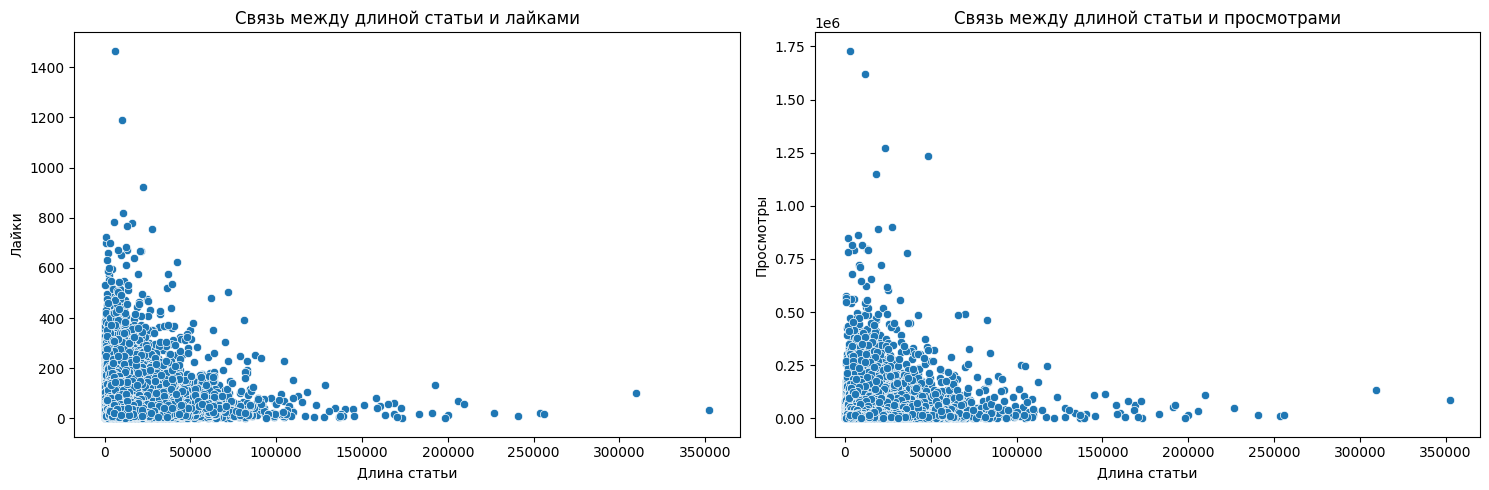

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='content_len', y='votes_plus', data=articles)
plt.title('Связь между длиной статьи и лайками')
plt.xlabel('Длина статьи')
plt.ylabel('Лайки')

plt.subplot(1, 2, 2)
sns.scatterplot(x='content_len', y='views', data=articles)
plt.title('Связь между длиной статьи и просмотрами')
plt.xlabel('Длина статьи')
plt.ylabel('Просмотры')

plt.tight_layout()
plt.show()